# Conversions of mole fractions, molality and molarity



In [1]:
# Needed libraries

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
from IPython.display import Audio

# soundfile = 'Pika Pika Happy.mp3' # Ignore these I was playing around with audio

# Audio(soundfile,autoplay = True)

# Definitions

m = molality  
c = molarity  
x_salt = mole fraction of solute  
x_solv = mole fraction of solvent  

v = neu, moles of ion  
M_solv = molecular weight of solvent  
M_salt = molecular weight of salt  
d_solv = density of solv  
d_salt = density of salt  


# Calculating m (molality) and c (molarity) from mole fractions

In [2]:
# Mole fractions of salt and solvent ranging from 0 to 1
x_salt = np.linspace(0.0001,1,num=100) # Created a random range of numbers for fractions (always 0<x<1)
x_solv = 1-x_salt

# Molecular weight of salt(LiPF6) and solvent(EC) in g/mol
M_salt = 151.905 # LiPF6
M_solv = 88.062 # EC

# Densities of chosen salt and solvent in g/mol
#d_salt = 0 # LiPF6 # 0 because solids alone has no molar density (they do have volumetric density but that's irrelevant here)
d_solv = 1.321 # EC

In [3]:
# Calculate molality(mol/kg) and molarity(mol/L)

totalmass = M_salt+M_solv # total molecular mass of salt and solvent in g/mol

solutionvolume = totalmass/d_solv # total volume of salt in solvent in mL

c = x_salt/(solutionvolume/1000) # Convert mL to L

m = x_salt/(totalmass/1000) # Convert g to kg

Text(0, 0.5, 'c')

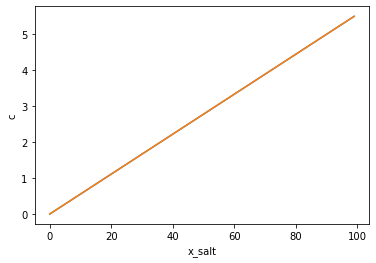

In [4]:
# Calculate molarity from molality multiplied by d_solv
c2 = m*d_solv

# Compare c from mole fraction and c computed
plt.plot(c) # molarity converted from mole fraction
plt.plot(c2) # molarity calculated from molality multiplied by d_solv
plt.xlabel('x_salt')
plt.ylabel('c')

Proves that c = m*d_solv (molarity = molality * density of solvent)

# Getting the factor value between c (molarity) and m (molality)

In [15]:
# TD vs c^1/2, Digitized from Figure 7 of a literature paper
fig7 = pd.read_csv('TD vs c_1_2.csv') # read data from raw data from a paper
pd.set_option("display.max_rows", None) # Display all rows

In [16]:
fig7

,c^1/2,TD
0,0.004246,1.002717
1,0.016985,1.002717
2,0.027601,1.002717
3,0.038217,0.994565
4,0.050955,0.994565
5,0.061571,0.994565
6,0.072187,1.002717
7,0.082803,1.002717
8,0.095541,1.002717
9,0.106157,1.010870


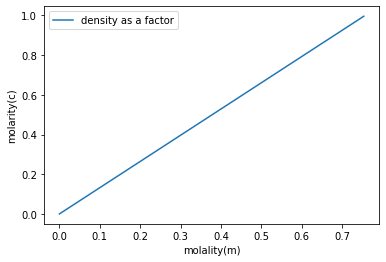

In [17]:
# Define c and m
c_fig7 = fig7['c^1/2']**2
m_fig7_1 = c_fig7/d_solv

# Plot c vs m
plt.plot(m_fig7_1,c_fig7,label='density as a factor')
plt.xlabel('molality(m)')
plt.ylabel('molarity(c)')
plt.legend()

# Equation 17

Equation 17 from the Stewart textbook and another equation 17 from the Newman textbook provide equations that convert molarity to molality (and vice versa). The following cells examines how accurate those equations are compared to the previous density formula

In [18]:
# Eqn 17 from the Stewart textbook for Ethyl Carbonate and LiPF6
density = (0.1428*c_fig7/1000) + d_solv

# Eqn 17 from the Newman textbook
c_solute1 = c_fig7 # mol/L
M_solute1 = M_salt # g/mol
cM_solute1 = c_solute1*M_solute1 # g/L

m_fig7_2 = c_solute1*1000/(density*1000-cM_solute1) # mol/kg

# removed sum() to get correct results

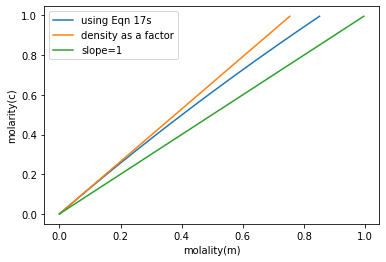

In [19]:
# Plot m vs c (eqn17)
plt.plot(m_fig7_2,c_fig7, label='using Eqn 17s')
plt.xlabel('molality(m)')
plt.ylabel('molarity(c)')

# Plot m vs c (density as factor)
plt.plot(m_fig7_1,c_fig7)

# Plot m vs c (if slope = 1)
m_fig7_3 = c_fig7
plt.plot(m_fig7_3,c_fig7)
plt.legend(['using Eqn 17s','density as a factor','slope=1'])

In [23]:
# % error

slope_17 = c_fig7/m_fig7_2
slope_density = c_fig7/m_fig7_1

percent_error_molality = (m_fig7_1[92]-m_fig7_2[92])*100/m_fig7_1[92] #picked the 92nd value at random
percent_error_slope = (slope_density[92]-slope_17[92])*100/slope_density[92]

In [21]:
percent_error_slope

11.439701642820074

In [22]:
percent_error_molality

-12.917415427714175